# Logistic regression with PCA

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

## Loading the dataset

In [2]:
breast_canser = load_breast_cancer()
X = breast_canser["data"]
y = breast_canser["target"]
cols = breast_canser["feature_names"]
df = pd.DataFrame(X, columns=cols)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## Splitting the dataset into train and test

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=105)
print(f"X_train {X_train.shape}")
print(f"X_test {X_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test{y_test.shape}")

X_train (398, 30)
X_test (171, 30)
y_train (398,)
y_test(171,)


## Scaling the variables

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Using principal component analysis

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)

print(f"pca_train {pca_train.shape}")
print(f"pca_test {pca_test.shape}")

pca_train (398, 2)
pca_test (171, 2)


## Training logistic regression on PCA training set

In [7]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(pca_train, y_train)

LogisticRegression()

## Predicting the test results

In [8]:
y_pred = clf.predict(pca_test)
y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

## Evaluation


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        59
           1       0.98      0.97      0.98       112

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



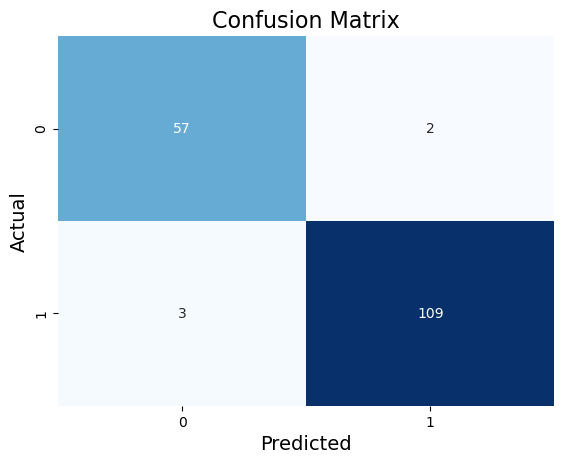

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"\nClassification Report:\n{report}")
ax = sns.heatmap(cm, annot=True, cmap="Blues", cbar=False, fmt="d")
ax.set_xlabel("Predicted", fontsize=14)
ax.set_ylabel("Actual", fontsize=14)
ax.set_title("Confusion Matrix", fontsize=16);

## Visualising the Training/Testing set and  results

In [10]:
from matplotlib.colors import ListedColormap
cp = ListedColormap(["red", "green"])
(X1, X2) = np.meshgrid(
    np.arange(start=pca_train[:, 0].min() - 1, stop=pca_train[:, 0].max() + 1, step=0.1),
    np.arange(start=pca_train[:, 1].min() - 1, stop=pca_train[:, 1].max() + 1, step=0.1),
)
mesh_pred = clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)


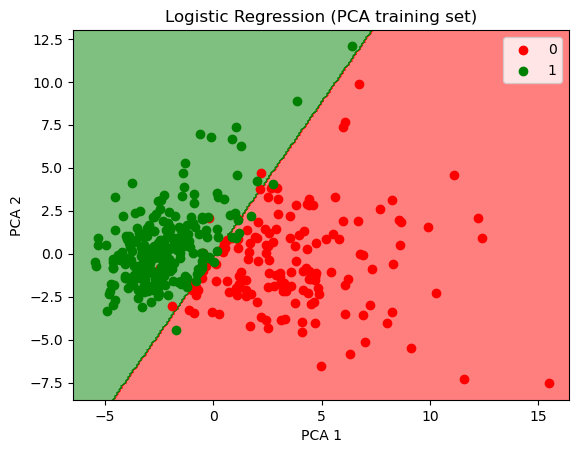

In [11]:
plt.contourf(X1, X2, mesh_pred, alpha=0.5, cmap=cp)
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(pca_train[y_train == j, 0], pca_train[y_train == j, 1], color=cp(i), label=j)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title("Logistic Regression (PCA training set)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

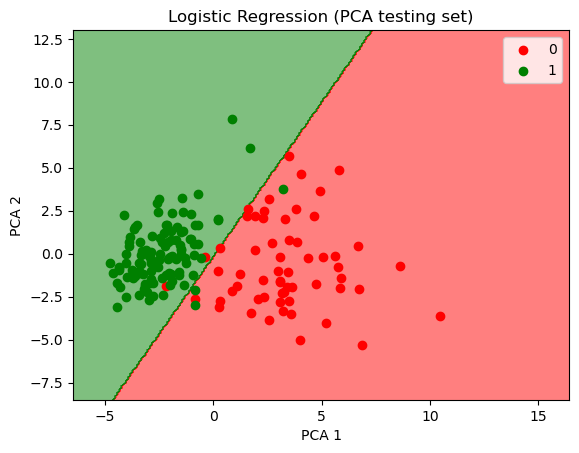

In [12]:
plt.contourf(X1, X2, mesh_pred, alpha=0.5, cmap=cp)

for i, j in enumerate(np.unique(y_test)):
    plt.scatter(pca_test[y_test == j, 0], pca_test[y_test == j, 1], color=cp(i), label=j)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title("Logistic Regression (PCA testing set)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()